**2 Class Expression Recognition with Transfer Learning (MobileNet) by Alvon Danilo Sukardi**

**Input Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow import keras
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.applications import MobileNet
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

**Data Understanding + Visualization**

In [ ]:
path = '/content/drive/MyDrive/SmartGateSystem/Clean_Dataset/'
temp_img_array = cv2.imread(path + 'Angry/Training_20655.jpg')
print(temp_img_array.shape)

(48, 48, 3)


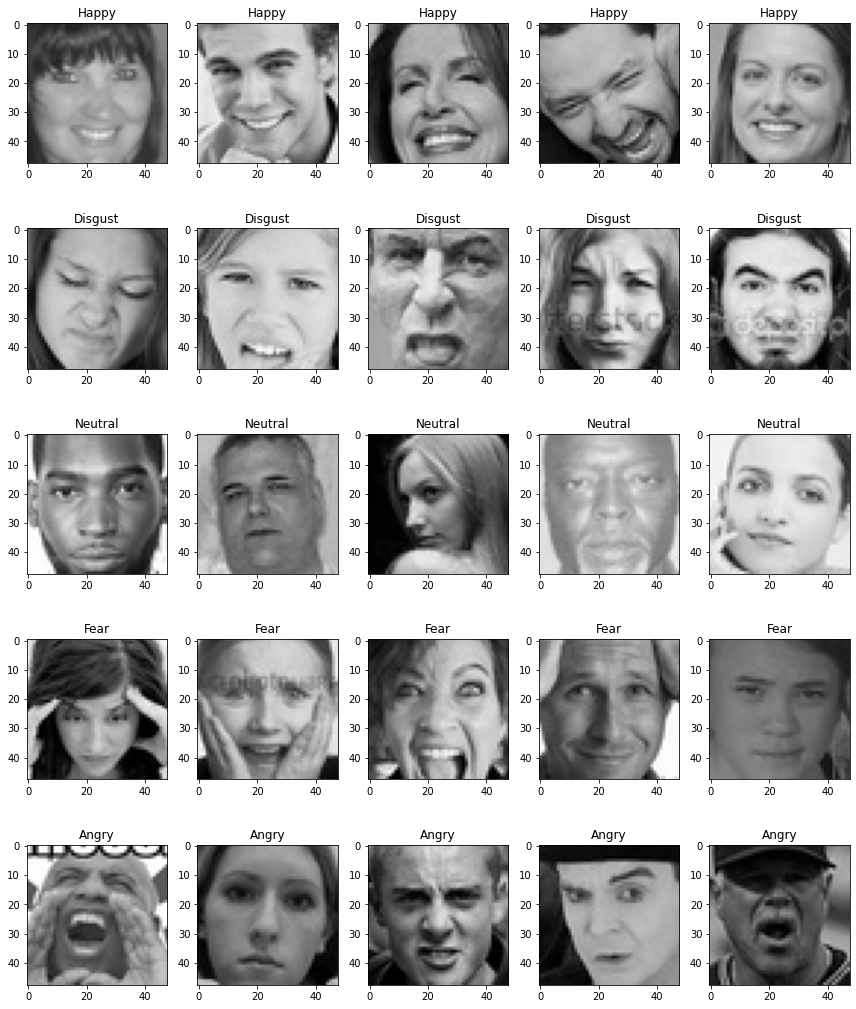

In [ ]:
pic_size = 48

plt.figure(0, figsize=(12,20))
temp = 0
img = []

for expression in os.listdir(path):
    for i in range(1, 6):
        temp = temp + 1
        plt.subplot(7, 5, temp)
        img = load_img(path + expression + "/" +os.listdir(path + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap='gray')
        plt.title(expression.title())

plt.tight_layout()
plt.show()

In [ ]:
print('Total Dataset\n')
total_images = 0
for emotion in os.listdir(path):
  print(emotion + ": " + str(len(os.listdir(path + emotion))) + ' images')
  total_images += len(os.listdir(path + emotion))
print('\nTotal images: ' + str(total_images) + ' images')

Total Dataset

Happy: 6834 images
disgust: 380 images
Neutral: 4295 images
fear: 2535 images
Angry: 2832 images

Total images: 16876 images


**Dataset Converting & Filtering**

In [ ]:
my_emotion = ['Angry', 'Happy']
img_arr = np.empty(shape=(9666,48,48,3))
img_label = np.empty(shape=(9666))
label_dict = {}

i = 0
e = 0
for emotion in os.listdir(path):
    if emotion in my_emotion:
        label_dict[e] = emotion
        for image in os.listdir(path + emotion + "/"):
            img_arr[i] = cv2.imread(path + emotion + "/" + image)
            img_label[i] = e
            i += 1
        print('All images in ' + emotion + ' has been input to numpy array')
        e += 1

print()
print(label_dict)
img_arr.shape, img_label

All images in Happy has been input to numpy array
All images in Angry has been input to numpy array

{0: 'Happy', 1: 'Angry'}


((9666, 48, 48, 3), array([0., 0., 0., ..., 1., 1., 1.]))

In [ ]:
img_label.shape

(9666,)

In [ ]:
img_label = np_utils.to_categorical(img_label)
img_label.shape

(9666, 2)

In [ ]:
img_label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

**Dataset Splitting**

In [ ]:
img_arr = img_arr / 255.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_arr, img_label,
                                                    shuffle=True, stratify=img_label,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8699, 48, 48, 3), (967, 48, 48, 3), (8699, 2), (967, 2))

**Model Building**

In [ ]:
num_classes = 2
featurizer = MobileNet(include_top=False, weights='imagenet', input_shape=(48,48,3), classes=num_classes)

x = Flatten()(featurizer.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

model = Model(inputs = featurizer.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                      

In [ ]:
train_datagenerator = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
)
train_datagenerator.fit(X_train)

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
hist = model.fit_generator(train_datagenerator.flow(X_train, y_train, batch_size=25),
                                steps_per_epoch=len(X_train) / 25,
                                epochs=20,
                                validation_data = (X_test, y_test),
                                use_multiprocessing=True,
                                )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


347/347 [==============================] - 190s 535ms/step - loss: 0.6678 - accuracy: 0.7089 - val_loss: 0.4353 - val_accuracy: 0.8108
Epoch 2/20
347/347 [==============================] - 197s 566ms/step - loss: 0.4219 - accuracy: 0.8112 - val_loss: 0.3526 - val_accuracy: 0.8407
Epoch 3/20
347/347 [==============================] - 185s 529ms/step - loss: 0.3486 - accuracy: 0.8492 - val_loss: 0.2885 - val_accuracy: 0.8811
Epoch 4/20
347/347 [==============================] - 192s 550ms/step - loss: 0.3003 - accuracy: 0.8663 - val_loss: 0.2500 - val_accuracy: 0.8997
Epoch 5/20
347/347 [==============================] - 163s 467ms/step - loss: 0.2932 - accuracy: 0.8752 - val_loss: 0.2911 - val_accuracy: 0.8583
Epoch 6/20
347/347 [==============================] - 160s 459ms/step - loss: 0.2692 - accuracy: 0.8886 - val_loss: 0.2344 - val_accuracy: 0.9059
Epoch 7/20
347/347 [==============================] - 148s 425ms/step - loss: 0.2600 - accuracy: 0.8929 - val_loss: 0.4324 - val_accura

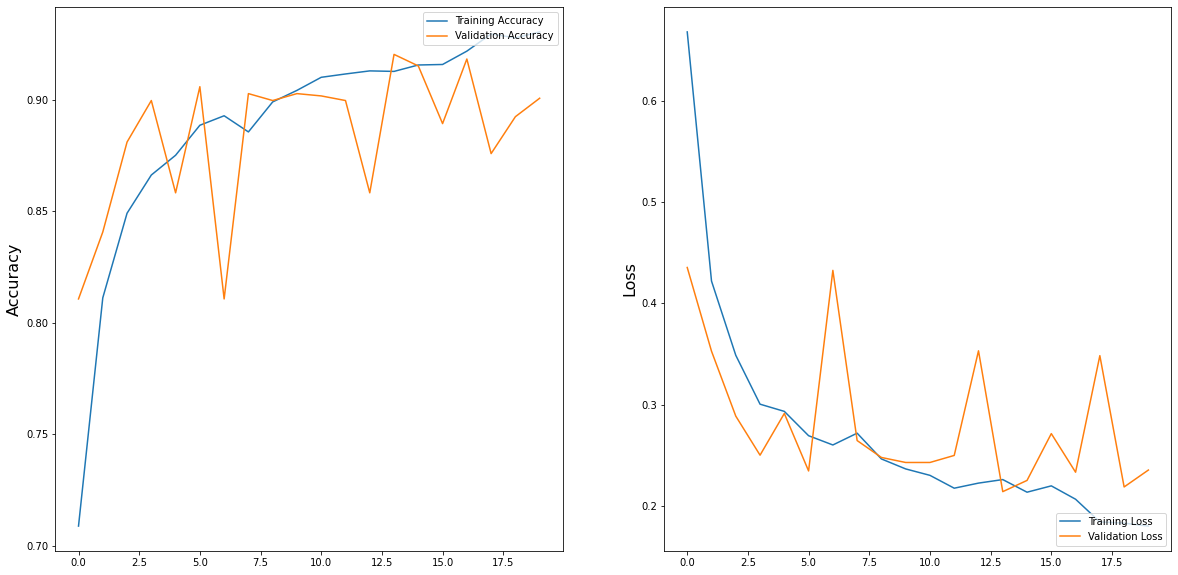

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend(loc='lower right')


plt.show()